# MultiOn API Example

Install the latest `multion` python package

In [41]:
!pip install --upgrade multion -q

In [42]:
import multion

In [43]:
multion.__version__

'0.3.12'

### Generate MultiOn API Key and login

Visit [here](https://app.multion.ai/api-keys) to create your MultiOn API Key

In [44]:
multion.login(use_api=True, multion_api_key="<YOUR_API_KEY>")

Please visit this URL to generate an API Key: https://app.multion.ai/api-keys


### Set API Mode
Switch the API to local mode to run the Agent locally with the MultiOn Browser Extension for testing

(You can enable the remote mode to run on our hosted cloud for production use)

In [45]:
multion.set_remote(False)

False

### Try the MultiOn Browse API

Give an input language command, starting url and max steps for the agent to take

In [46]:
multion.browse(
    {
        "cmd": "what is the weather today in sf",
        "url": "https://www.google.com",
        "maxSteps": 10,
    }
)

Server Disconnected. Please press connect in the
                Multion extension popup


In [47]:
response = multion.browse(
    {
        "cmd": "Can you look up steve k frey on twitter and extract their twitter bio and latest tweets?",
        "url": "https://twitter.com",
        "maxSteps": 10,
    }
)

Server Disconnected. Please press connect in the
                Multion extension popup


### OPTIONAL: Try the MultiOn Low-level APIs for granular control

`create_session`: Create a new MultiOn Agent with a given starting url

In [34]:
response = multion.create_session({"url": "https://www.google.com", "includeScreenshot": True})
print(response['message'])
session_id = response['session_id']
session_id

'308443683'

In [ ]:
response

{'url': 'https://www.google.com',
 'screenshot': 'https://multion-client-screenshots.s3.us-east-2.amazonaws.com/c2428ea1-b031-40e9-bf75-8273e90308d0__screenshot.png',
 'session_id': '308438925',
 'message': '',
 'status': 'CONTINUE'}

`step_session`: Steps the MultiOn Agent once using the specified input command and url 

Agent outputs a status `CONTINUE` if command has not been fulfilled yet, else `DONE`

In [ ]:
response = multion.step_session(session_id, {"input": "what is the weather today","url": "https://www.google.com", "includeScreenshot": True})
response['message']

"I am navigating to Google Search to find out the weather today in Palo Alto, CA, which is the user's current location.\n\n"

In [ ]:
response

{'url': 'https://www.google.com/search?q=weather+today+Palo+Alto+CA',
 'screenshot': 'https://multion-client-screenshots.s3.us-east-2.amazonaws.com/c2428ea1-b031-40e9-bf75-8273e90308d0_6f13a6b4-5c6f-4c65-bf52-e10af3f82a51_screenshot.png',
 'session_id': '308438925',
 'message': "I am navigating to Google Search to find out the weather today in Palo Alto, CA, which is the user's current location.\n\n",
 'status': 'CONTINUE'}

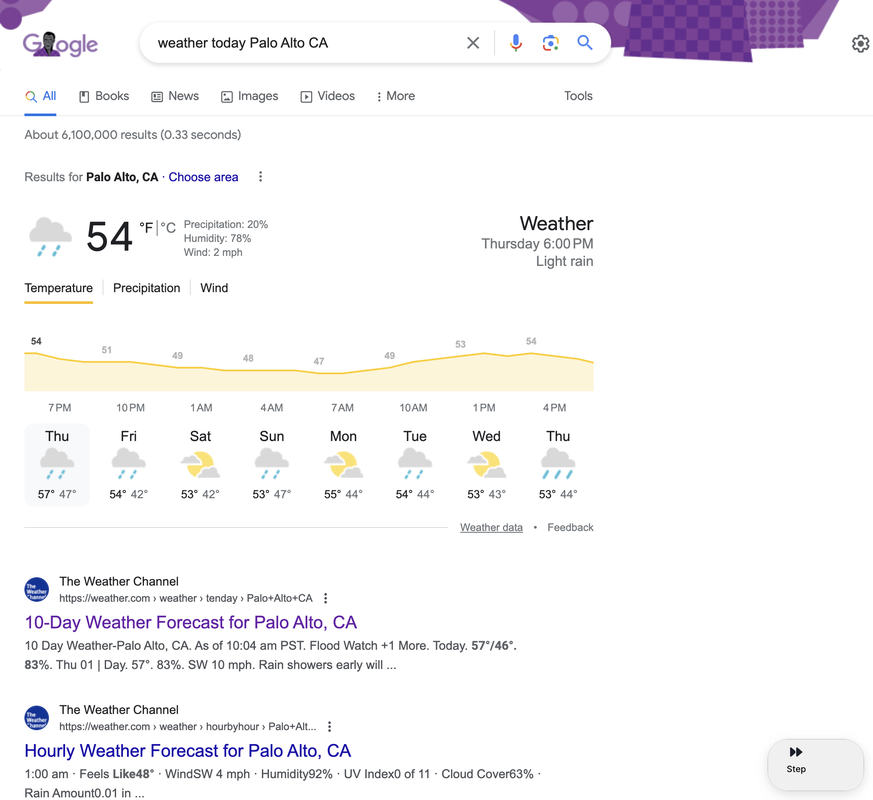

In [ ]:
multion.get_screenshot(response, height=800)

`close_session`: Terminate the agent and close the session

In [ ]:
multion.close_session(session_id)

'Session 308438925 terminated'